Author: Lijing Wang, lijing52@stanford.edu; David Zhen Yin, yinzhen@stanford.edu; Jef Caers, jcaers@stanford.edu (2021)

# Introduction to Extreme Value Statistics

In the geosciences, we are often interested in knowing more about high values, more so than average values. Extreme highs (or lows) can be of scientific interest, or simply directly affect our daily lives, such as floods or earthquakes. Extreme value statistics is a branch of applied statistics that provide ways of analyzing and predicting such high values. 

**Why do we need a new form of statistics, and just not “regular” statistics?** For one, we are interested in extrapolating beyond the highest value in our dataset. Because our data is limited (either in time or space), it is unlikely that we have observed all high values. If we have accurately recorded floods in some area over the last 50 years, what kind of floods can we expect over the next 100 years? Evidently, that 100-year flood has high probability to be larger than the maximum observed over the last 50 years. Extrapolation should be done with care and requires having a clear foundation. 

Extrapolating in statistics and machine learning is fraud with difficulties: there is no guarantee that the statistical model we use for the average values applies equally for unobserved (large) values. **Extreme value theory**, which provides rigorous ways of establishing some ideas on what that extrapolation can be does not provide such guarantee, but it does provide a systematic approach that can be verified. 

Let's start our Extreme Value Statistics journey, with the hardest natural material in the world: Diamond. 

Please allow cookies on this site if you don't see figures.







### Load 2 diamond datasets

Suppose a diamond mining company found new diamond deposits, and this company wants to determine whether these deposits are economically viable for mining. Hence a valuation is required. This requires sampling, meaning drilling or excavating part of the deposits and analyzing the diamonds recovered. Because diamonds are rare, one only usually gets a hundred to a thousand stones. These stones are weighted and their \$ value calculated from attributes like quality, inclusion, color, etc. ... 

Diamond weight/size is expressed in carats (ct). Hence, for every stone we have two variables: a size & dollar value. We will consider **size** here only. Since large stones are very valuable (e.g. 2 carat stones fetch \$5K to \$50K; 10 ct between \$20K and \$200K in 2020), one would like to know how many large stones are present in the entire deposit, given the limited sample, since large stones is what makes a mine profitable.

You will be given **2 diamond datasets**, each from a different deposit, at the valuation stage to understand the size distribution of diamonds, and provide your estimation of total value if we mine 100,000 diamonds in these two deposits. 

![aikhal.jpg](https://drive.google.com/uc?export=view&id=1YNgFQf3b9ICKK0pZdeq9DEXMchjyc4IW)

A open pit diamond mine: Aikhal (means ‘fame’), the biggest diamond mine in the world, located in the far east of Russia (Source: https://www.costerdiamonds.com/blog/top-10-biggest-diamond-mines/)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/GEOLSCI6_EARTHSYS100A.git

fatal: destination path 'GEOLSCI6_EARTHSYS100A' already exists and is not an empty directory.


In [ ]:
# Load 2 diamond datasets: size for each mined diamond
# For your own dataset, you can click Files on the left bar, and upload your dataset
## Diamond dataset 1, number of diamonds: 1,000
diamond_dataset1 = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/EVS_diamond/diamond_dataset_1.txt')
## Diamond dataset 2, number of diamonds: 500
diamond_dataset2 = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/EVS_diamond/diamond_dataset_2.txt')

In [ ]:
print('Diamond dataset 1, first 5 diamond weights: '+str(diamond_dataset1[:5])+' ct')
print('Diamond dataset 2, first 5 diamond weights: '+str(diamond_dataset2[:5])+' ct')

Diamond dataset 1, first 5 diamond weights: [3.45928685 1.55249399 0.60598563 1.37401453 0.24024135] ct
Diamond dataset 2, first 5 diamond weights: [0.99415461 0.58314584 0.78667638 2.20305214 0.1156022 ] ct


## Exploratory Data Analysis with basic statistics

### Histogram of size distribution of Diamond

**Histogram**
*   A histogram groups values into bins
*   The height of each bar shows how many fall into each bin.

In [ ]:
plt.hist(diamond_dataset1,bins = 30,alpha = 0.5,label = 'Dataset 1')
plt.hist(diamond_dataset2,bins = 30,alpha = 0.5,label = 'Dataset 2')
plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.legend()

NameError: ignored

### Mean and variance of size of 2 deposits

We observe that both distributions are  highly skewed, which is aligned with our common sense: more small diamonds, rare large diamonds. And Deposit 1 has more small diamonds. 

However from histograms above, we have hard time to investigate extreme large values, which are very valuable. 

In [ ]:
## Mean of entire datasets
print('Mean of diamond weights, dataset 1: '+str(np.round(np.mean(diamond_dataset1),2))+' ct')
print('Mean of diamond weights, dataset 2: '+str(np.round(np.mean(diamond_dataset2),2))+' ct')

Mean of diamond weights, dataset 1: 1.37 ct
Mean of diamond weights, dataset 2: 1.56 ct


In [ ]:
## Variance of entire datasets
print('Variance of diamond weights, dataset 1: '+str(np.round(np.var(diamond_dataset1),2)))
print('Variance of diamond weights, dataset 2: '+str(np.round(np.var(diamond_dataset2),2)))

Variance of diamond weights, dataset 1: 4.89
Variance of diamond weights, dataset 2: 5.7


Large diamonds are rare. Say by chance, in the mining process, we miss the biggest 3 stones in these two deposits. How does the mean of size of diamonds change?

In [ ]:
sorted_diamond_dataset1 = np.sort(diamond_dataset1)
sorted_diamond_dataset2 = np.sort(diamond_dataset2)
## exclude the biggest x stones: sorted_diamond_dataset1[:-3] 
## exclude the smallest x stones: sorted_diamond_dataset1[3:] 

In [ ]:
print('Mean of diamond weights, dataset 1, removing the biggest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset1[:-3]),2))+' ct')
print('Mean of diamond weights, dataset 2, removing the biggest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset2[:-3]),2))+' ct')

Mean of diamond weights, dataset 1, removing the biggest 3 stones: 1.32 ct
Mean of diamond weights, dataset 2, removing the biggest 3 stones: 1.44 ct


In [ ]:
print('Variance of diamond weights, dataset 1, removing the biggest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset1[:-3]),2)))
print('Variance of diamond weights, dataset 2, removing the biggest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset2[:-3]),2)))

Variance of diamond weights, dataset 1, removing the biggest 3 stones: 3.88
Variance of diamond weights, dataset 2, removing the biggest 3 stones: 3.08


Therefore, using empirical mean to evaluate extreme value distributions is not very **robust**. Robust is a statistical concept that signifies that estimates are subject to considerbale change when making small changes to a dataset. If we rely only on the average, we may significant underestimate or overestimate the value of our deposit.


---

We can also have a rough estimation on exceedance, focusing on diamond > 10ct. In deposit 2, we have:

In [ ]:
print('# of diamonds > 10 ct: '+str(np.sum(diamond_dataset2>10)))

# of diamonds > 10 ct: 10


Out of

In [ ]:
print('# of diamonds: '+str(len(diamond_dataset2))) 

# of diamonds: 500


which is 10/500. 
If we would not observe the largest 3 diamonds, >10 ct diamond ratio would be 7/500. Let's say in the future, we would mine 100,000 stones in this deposit. 

Taking the average value of 10 ct diamonds: \$100K*  10   * (100,000/500) = 200M. 
Miss the largest 3 diamonds: \$100K * 7 *(100,000/500) = 140M. 

The difference is 35% or 60 million dollars. The uncertainty is substantial. 


### Quantile-Quantile plot (QQ-plot)
Can we find a better way to compare those two deposits, rather than histogram or mean? Here we introduce the concept of quantile and QQ-plot: 

**Quantile**
*   Quantile is a value in a distribution that relate to the rank order of values in that distribution.
*   For example, 25% quantile is the value in a dataset at which 25% percent is less or equal than this value and hence, 75% is larger.
*   Median: 50% quantile or middle quantile
*   Upper and lower quartile: 75% quantile and 25% quantile



Ex. The 25% quantile/lower quartile of deposit 2 is:


In [ ]:
print(str(np.quantile(diamond_dataset2,0.25))+' ct') # 25% quantile

0.5325708996163748 ct


**Quantile-Quantile plot**
*   We calculate quantiles for the two distributions, and plot first dataset quantiles against second dataset quantiles. 
*   If two distributions are similar, value in the QQ-plot will fall along the 45-degree reference line. 
*   Even when the # of samples are different in the two datasets, we can still calculate and compare quantile, and compare these two distributions by Q-Q plot. 

Let's then use QQ-plot to compare our two deposits' distributions.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Quantile-Quantile plot')

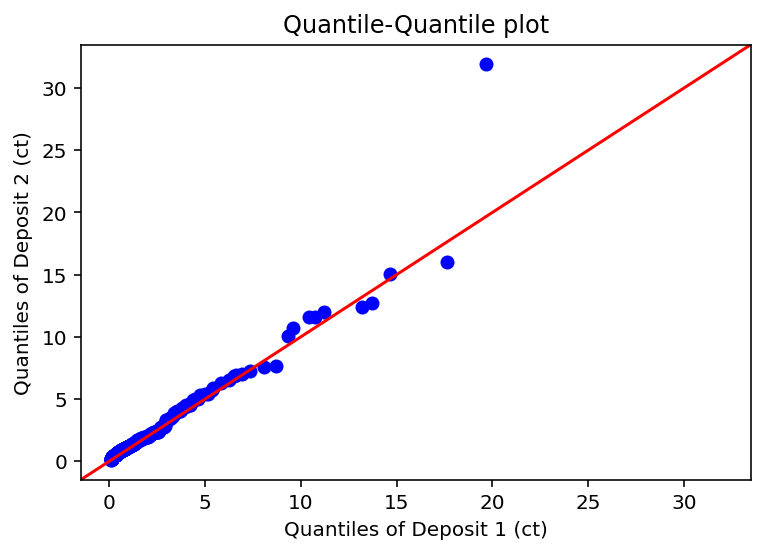

In [ ]:
from statsmodels.graphics.gofplots import qqplot_2samples
## QQplot
qqplot_2samples(diamond_dataset2,diamond_dataset1,line='45')
plt.xlabel('Quantiles of Deposit 1 (ct)')
plt.ylabel('Quantiles of Deposit 2 (ct)')
plt.title('Quantile-Quantile plot')

Each point in QQ-plot represents

(a% quantiles of Deposit 1, a% quantiles of Deposit 2) 

if a% is 25%, the corresponding point is:

(0.33 ct, 0.53 ct)

We observe that Deposit 1 and 2 have similar distribution of smaller diamond sizes. Deposit 2 has more larger diamonds (>20ct) than Deposit 1. In this way, even our datasets are skewed, we can compare their "tails" (extreme values), and see which distribution has a longer or thicker "tail".  

### Logarithm
Extreme values or a skewed distribution are not easy to be investigated in histogram plots. The simplest way to reduce the skewness of extreme value distributions, is to take the **logarithm**. 

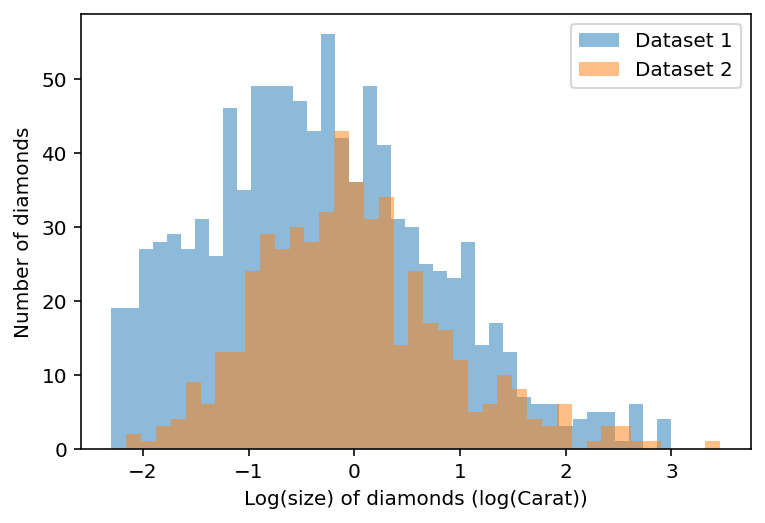

In [ ]:
plt.hist(np.log(diamond_dataset1),bins = 40,alpha = 0.5,label = 'Dataset 1')
plt.hist(np.log(diamond_dataset2),bins = 40,alpha = 0.5,label = 'Dataset 2')
plt.xlabel('Log(size) of diamonds (log(Carat))')
plt.ylabel('Number of diamonds')
plt.legend()

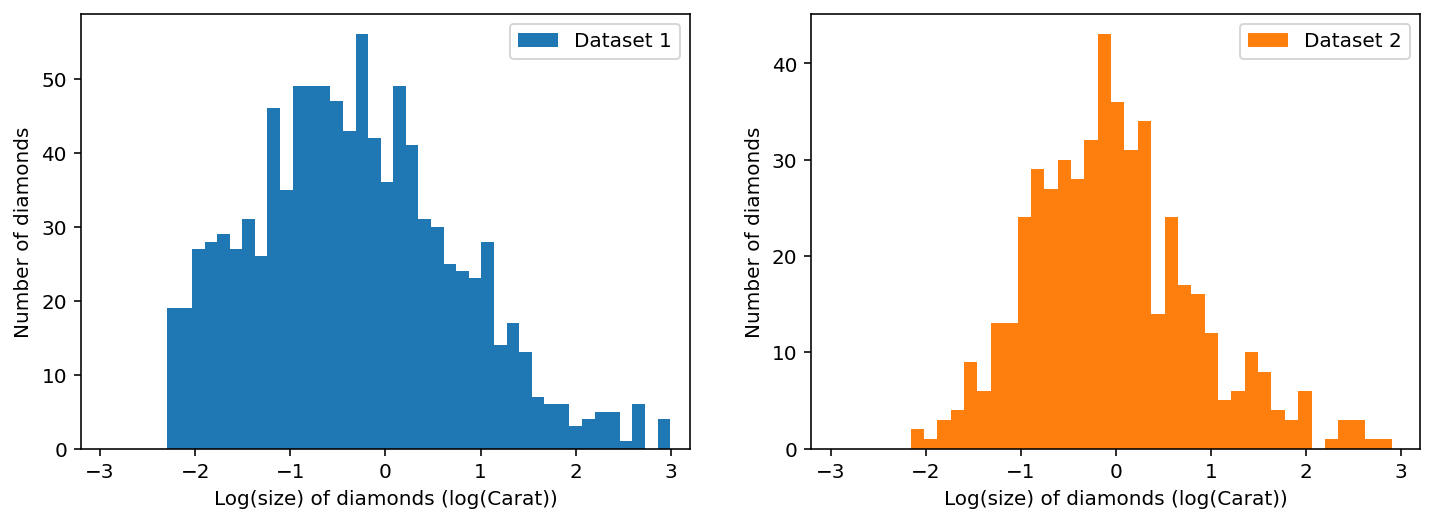

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(np.log(diamond_dataset1),bins = 40,alpha = 1,label = 'Dataset 1',color = 'C0')
plt.xlabel('Log(size) of diamonds (log(Carat))')
plt.ylabel('Number of diamonds')
plt.xlim(-3.2,3.2)
plt.legend()
plt.subplot(122)
plt.hist(np.log(diamond_dataset2),bins = 40,alpha = 1,label = 'Dataset 2',color = 'C1')
plt.xlabel('Log(size) of diamonds (log(Carat))')
plt.ylabel('Number of diamonds')
plt.xlim(-3.2,3.2)
plt.legend()

After taking the logarithm, our sampled data is more evenly distributed, and more similar to the normal distribution in basic statistics. **Therefore, if you have any extreme dataset and the value is positive, please take a logarithm first and then visualize.**

In the histogram, the height of each bar shows how many fall into each bin. However, if sample sizes are different across different distribution (dataset 1: 1,000; dataset 2: 500), comparing the absolute # of samples is not reasonable. How about we scale the histogram by the total number of samples?

### Probability density function (pdf)


**Probability density function:**


*   A random variable $X$, define the probability density function $f_X(x)$
$$f_X(x) = \lim_{\Delta \rightarrow 0^+} \frac{P(x < X \leq x+\Delta)}{\Delta}$$
*   $P(a < X \leq b) = \int_{a}^{b} f_X(x)\,dx $
*   $f_X(x) \geq 0, \forall x \in \mathbb{R}$ 

*   $\int_{-\infty}^{\infty}f_X(x) \,dx  = 1$ 

After scaling by the sample size, the height of each bar shows: 
*  \# of samples in each bin/total number of each bin, noted as **density** 

Then the area under histogram sums to 1 (100%). If the freqeuncy is high in one bin, then we say that the density (of sample values) in that bin is high. This frequency or **density** is a rough estimate of what is termed the **probability density function**. Or in other words, probability density function can be descrbed as the continuous version of histograms after scaling/densities.  

Now let's compare these two deposits from the estimated probability density function. 

In dataset 1, there are more small diamonds than dataset 2. Dataset 2 has a longer tail, more extreme stones. 

In both datasets, we don't have stones < 0.1 carat (see the truncated distribution, especially for Dataset1). The company uses sieves that disregard those stones. This again shows that if we use empirical average, we will lose many smaller stones, and get a biased estimation of extreme value distributions.

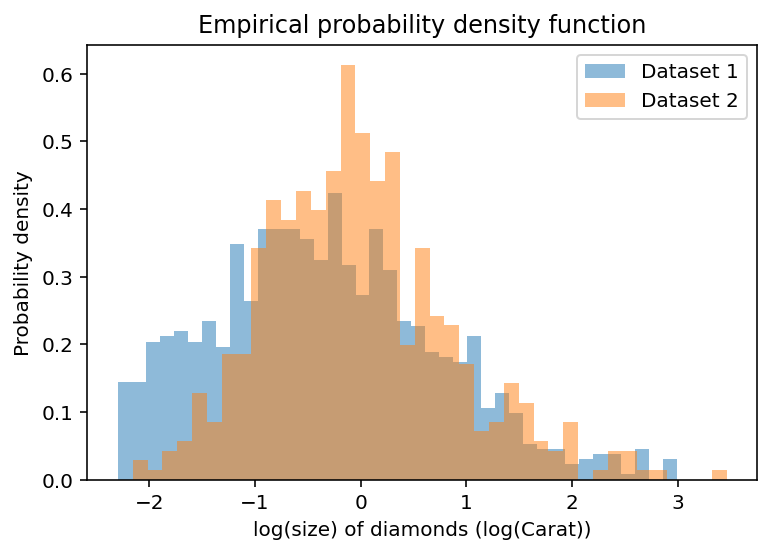

In [ ]:
plt.hist(np.log(diamond_dataset1),bins = 40,alpha = 0.5,density = True, label = 'Dataset 1')
plt.hist(np.log(diamond_dataset2),bins = 40,alpha = 0.5,density = True, label = 'Dataset 2')
plt.xlabel('log(size) of diamonds (log(Carat))')
plt.ylabel('Probability density')
plt.title('Empirical probability density function')
plt.legend()

### Cumulative distribution function (cdf) 

Cumulative distribution function (cdf) tells us the probability that $X$ takes a value less than or equal to $x$: 
$$P(X\leq x) = F_X(x) = \int_{-\infty}^{x}f_X(t)dt$$ 

Cdf is the integral of probability density function (pdf). 

Does this $P(X\leq x)$ ring a bell to you? Recall what we have learnt: **quantile**:

If $n$% quantile equals to $x$, then $P(X\leq x) = n\%$. 

Therefore, quantile is the inversed version of cumulative distribution function. 






For example, the 25% quantile of deposit 2 is:

In [ ]:
print(str(np.quantile(diamond_dataset2,0.25))+' ct')

0.5325708996163748 ct


then $P(X\leq x) = F_X(x)$ where $ x = 0.533$ is

In [ ]:
np.mean(diamond_dataset2<0.533)

0.25

Let's take a look on the cdf function for two deposits:

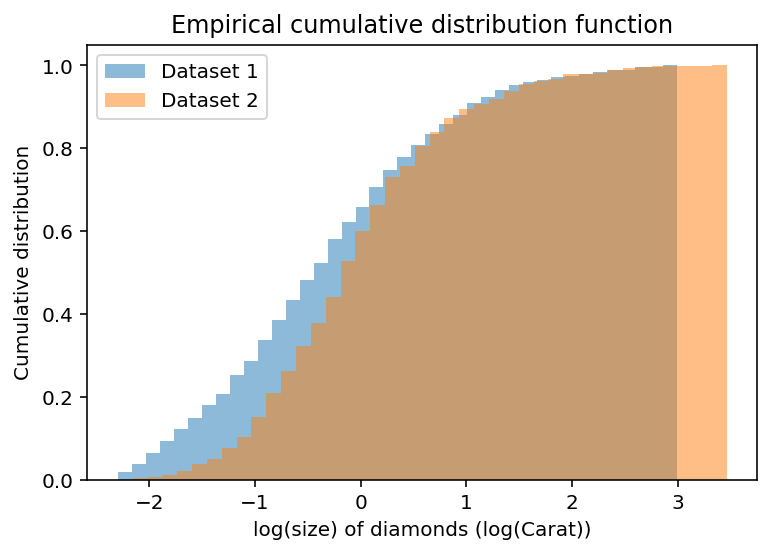

In [ ]:
plt.hist(np.log(diamond_dataset1),bins = 40,alpha = 0.5,density = True, cumulative = True, label = 'Dataset 1')
plt.hist(np.log(diamond_dataset2),bins = 40,alpha = 0.5,density = True, cumulative = True, label = 'Dataset 2')
plt.xlabel('log(size) of diamonds (log(Carat))')
plt.ylabel('Cumulative distribution')
plt.title('Empirical cumulative distribution function')
plt.legend()

Again, more small diamonds in dataset 1 than dataset 2. Dataset 2 has a longer tail, more extreme stones. 

## Probability distribution models (long tailed distributions)

So why take the logarithm? Is there any reasoning behind? Let's take a look on a "proportional effect" on growth or change. 

Let's say in the subsurface process, one diamond crystal is growing. At each time $t$, it will grow proportionally to the current size: 
$$X(t) - X(t-1) = \varepsilon(t)X(t-1)$$
Then, 
$$\frac{X(t) - X(t-1)}{X(t-1)} = \varepsilon(t)$$
If we do summation from $t = 0$ to $t = T$, and assume $\Delta t\rightarrow 0$:
$$\sum_{t = 0}^{T}\frac{X(t) - X(t-1)}{X(t-1)} = \sum_{t = 0}^{T}\varepsilon(t)$$
$$\int_{X(0)}^{X(T)} \frac{dX}{X} = \log(X(T))-\log(X(0)) = \int_{t = 0}^{T}\varepsilon(t)$$

**Here the logarithm appears!**

If the summation of proportion $\int_{t = 0}^{T}\varepsilon(t)$ is normally distributed, the logarithm of our diamond size at $T$ time is then following the normal distribution. 

Therefore, our diamond size is following **log-normal distribution**. If we collect $n$ diamonds in one deposit with this Gaussian proportional effect, the empirical diamond size distribution will be a long tail, log-normal distribution. In the pdf plot, we can see the distribution of log diamond size is similar to "the bell shape". 

### Log-normal distribution



**Definition:**

**Log-normal distribution**, is a continuous probability distribution of a random variable whose logarithm is normally distributed. 

*    Specifically, if a random variable $X$ is log normally distributed : 




$$X \sim \text{Lognormal}(\mu, \sigma^2)$$
then, 
$$Y = \text{log}(X), Y \sim N(\mu, \sigma^2)$$
is normally distributed. 


*    Probability density function for log-normal distributions: 
$$f_X(x;\mu, \sigma)  = \frac{1}{x\sigma\sqrt{2\pi}}\exp\left(-\frac{(\text{log}x-\mu)^2}{2\sigma^2}\right)$$


Let's take a look on the pdf of log-normal distribution with different $\mu$ and $\sigma$. 


In [ ]:
# Import extreme value sampling functions: log-normal, log-hyperbolic
import sys
import seaborn as sns
sys.path.append('/content/GEOLSCI6_EARTHSYS100A/EVS_diamond')
from extreme_value_sampling import *

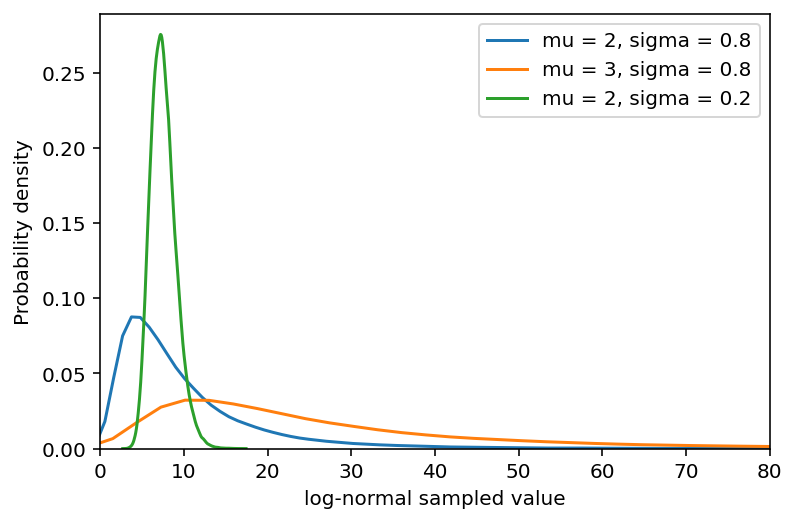

In [ ]:
# sample from log normal distribution
log_normal_samples1 = log_normal_sampling(N = 100000, mu = 2, sigma = 0.8) # mu = 2, sigma = 0.8
log_normal_samples2 = log_normal_sampling(N = 100000, mu = 3, sigma = 0.8) # mu = 3, sigma = 0.8
log_normal_samples3 = log_normal_sampling(N = 100000, mu = 2, sigma = 0.2) # mu = 2, sigma = 0.2
sns.kdeplot(log_normal_samples1,label = 'mu = 2, sigma = 0.8') # pdf
sns.kdeplot(log_normal_samples2,label = 'mu = 3, sigma = 0.8') 
sns.kdeplot(log_normal_samples3,label = 'mu = 2, sigma = 0.2') 
plt.xlim(0,80)
plt.xlabel('log-normal sampled value')
plt.ylabel('Probability density')
plt.legend()

We sampled N = 100,000 from log-normal distribution, with $\mu = 2$ or $\mu = 3$, $\sigma = 0.8$ or $\sigma = 0.2$, and approximate the pdf of log-normal distribution. 
Log-normal distribution is a long-tail, skewed distribution, with extreme values. $\mu$ and $\sigma$ are the location and scale parameters. We can then take a logarithm and test normality:

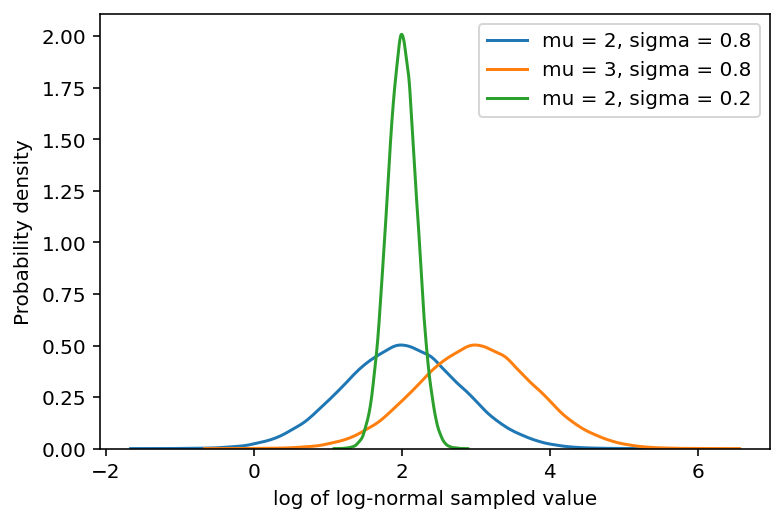

In [ ]:
# pdf after logarithm
sns.kdeplot(np.log(log_normal_samples1),label = 'mu = 2, sigma = 0.8')
sns.kdeplot(np.log(log_normal_samples2),label = 'mu = 3, sigma = 0.8')
sns.kdeplot(np.log(log_normal_samples3),label = 'mu = 2, sigma = 0.2')
plt.xlabel('log of log-normal sampled value')
plt.ylabel('Probability density')
plt.legend()

which all of three distributions are following the "bell" shape: the normal distribution. 

### Log normal quantiles

We learned about the quantile-quantile plot previously. A QQ-plot will compare two distributions by their quantiles. Can we compare a long tail distribution to the lognormal distribution? If these two distributions are similar, we can fit 2 parameters in log-normal distribution to make further predictions. 

We can calculate theoretical quantiles from the normal distribution. Therefore, if we want to compare an empirical long tailed distribution v.s. log normal distribution, we can first take the logarithm and create a QQ-plot: theoretical normal distribution quantiles v.s. empirical quantiles.

Let's compare our two diamond datasets with log normal distribution. 

Text(0.5, 1.0, 'Dataset 1')

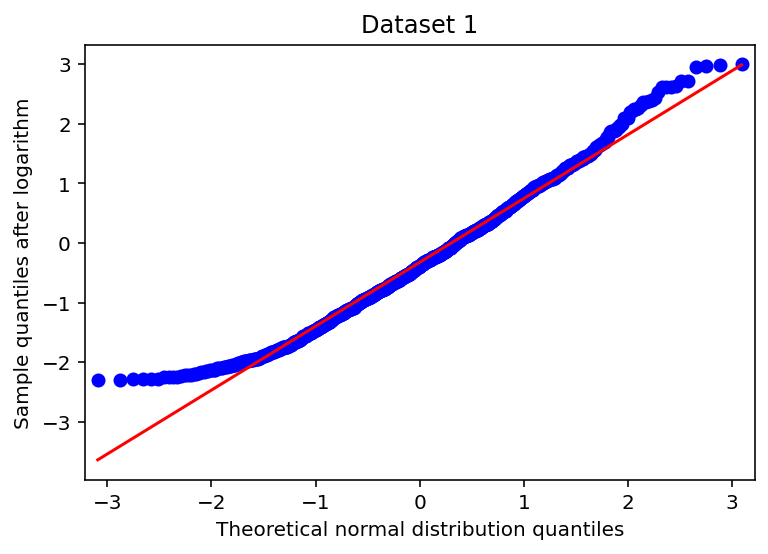

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(diamond_dataset1), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Sample quantiles after logarithm')
plt.title('Dataset 1')

Dataset1:

*   is similar to log-normal distribution in the middle part
*   has larger values on the lower bound of this distribution, probably because the company sieves all diamonds < 0.1 carat. 
*   has a similar/little bit larger tail values to/than the log-normal

Text(0.5, 1.0, 'Dataset 2')

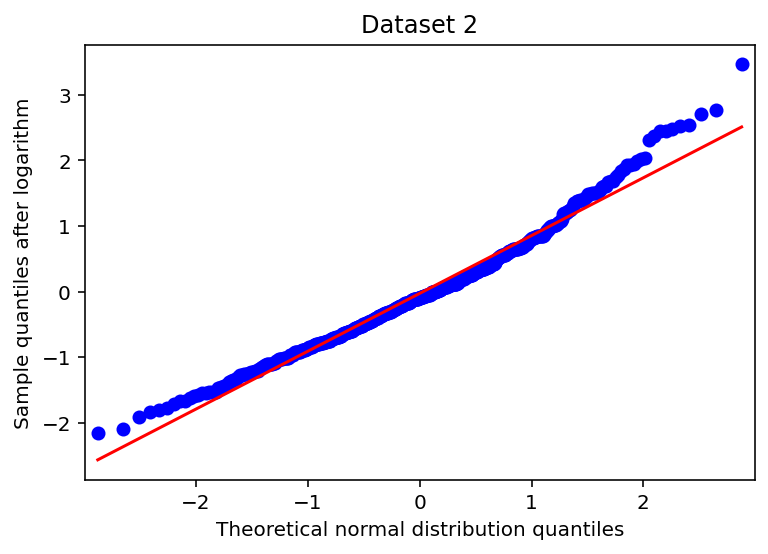

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(diamond_dataset2), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Sample quantiles after logarithm')
plt.title('Dataset 2')

Dataset2:

*   is similar to log-normal distribution on the head and middle part
*   has larger values on the tails than log-normal distributions 

### <font color='green'> [Advanced] Log hyperbolic distribution </font>
Another assumption of the proportional effect could be a hyperbolic distribution. Therefore, the diamond size will follow **the log-hyperbolic distribution**. 



If we do scatter plot on samples from the log-hyperbolic distribution:
*   x: logarithm of sampled values
*   y: logarithm of probability density

this log-log plot has a hyperbola shape.

**Definition:**

Probability density function for log-hyperbolic distributions with random variable $X$:

$$f_Y(y;\phi,\gamma,\mu,\delta) = \frac{\omega}{\delta\kappa K_1(\delta\kappa)}\exp(-\frac{(\phi+\gamma)}{2}\sqrt{\delta^2+(\log(x)-\mu)^2+\frac{(\phi-\gamma)}{2}(\log(x)-\mu)})$$

where
$\omega = \frac{1}{\frac{1}{\phi} + \frac{1}{\gamma} }$, $\kappa = \sqrt{\phi\gamma}$, $K_1(.)$ is the modified Bessel function of the third kind, and
$$x = \exp(y)$$

Hence, $y$ is hyperbolic distributed, $x$ is log-hyperbolic distributed.  

$\mu$ is a location parameter, $\delta$ is a scale parameter, $\phi$ and $\gamma$ give the slopes of the two linear asymptotes. 

Let's take a look on the pdf of log-hyperbolic distribution:

Text(0, 0.5, 'Probability density')

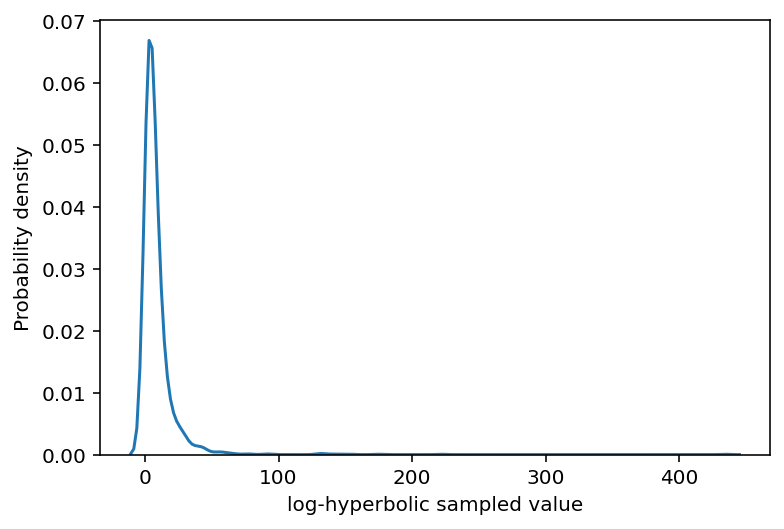

In [ ]:
## sampled from log-hyperbolic distribution, will take ~20s 
log_hyperbolic_samples = log_hyperbolic_sampling(N = 2000, phi = 1.2, gamma = 2, mu = 2, delta = 0.8) 
sns.kdeplot(log_hyperbolic_samples)
plt.xlabel('log-hyperbolic sampled value')
plt.ylabel('Probability density')

Here for better comparison with log-normal distribution, the location and scale parameter $\mu, \delta$ are the same as in log-normal distribution. 


Log hyperbolic distribution is also a long tail distribution. Its tail slope (upper bound) is controlled by $\gamma$, lower bound slope is controlled by $\phi$. 



Let's take the logarithm and compare distributions:

In [ ]:
## sampled from log-hyperbolic distribution, shorter tail, ~ 20s
log_hyperbolic_samples2 = log_hyperbolic_sampling(N = 2000, phi = 1.2, gamma = 8, mu = 2, delta = 0.8, seed = 200) 

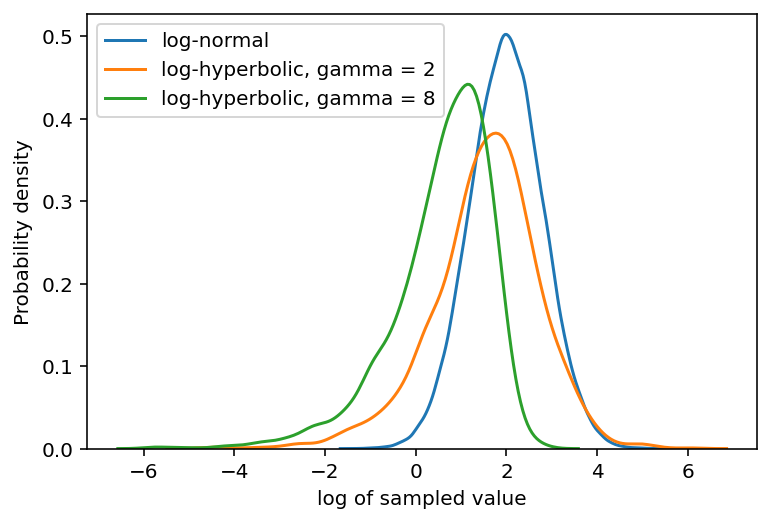

In [ ]:
sns.kdeplot(np.log(log_normal_samples1), label = 'log-normal')
sns.kdeplot(np.log(log_hyperbolic_samples),label = 'log-hyperbolic, gamma = 2')
sns.kdeplot(np.log(log_hyperbolic_samples2),label = 'log-hyperbolic, gamma = 8')
plt.xlabel('log of sampled value')
plt.ylabel('Probability density')
plt.legend()

Log normal distribution is symmetric. Log hyperbolic distribution is asymmetric (if $\gamma \neq \phi$), could have longer tail (i.e. $\gamma$ = 2) or shorter tail (i.e. $\gamma$ = 8) than log-normal distribution. Thereby, the log-hyperbolic distribution has more flexibility to fit real world extreme value distributions. 

We can also see the hyperbola after we take the logarithm of probability density, the log-log plot: 

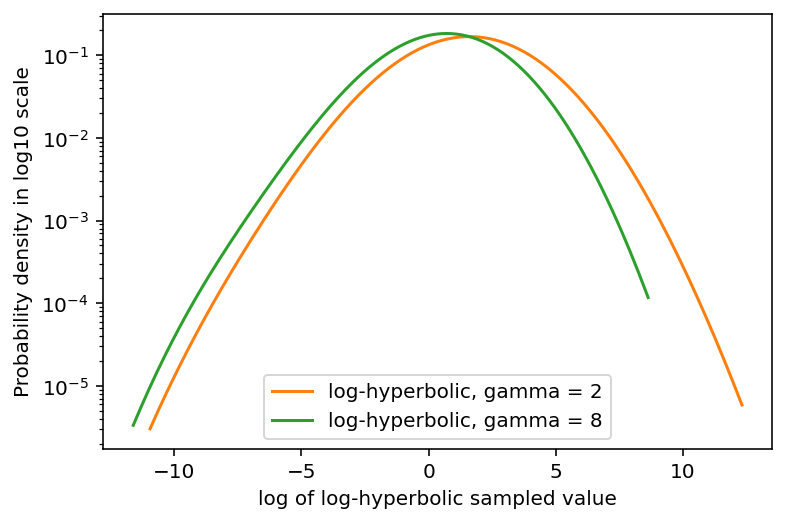

In [ ]:
sns.kdeplot(np.log(log_hyperbolic_samples),color = 'C1',label ='log-hyperbolic, gamma = 2',bw_adjust=8)
sns.kdeplot(np.log(log_hyperbolic_samples2),color = 'C2',label ='log-hyperbolic, gamma = 8',bw_adjust=8)
plt.xlabel('log of log-hyperbolic sampled value')
plt.ylabel('Probability density in log10 scale')
plt.yscale('log')
plt.legend()

By now we have learned two long-tail distributions 

In real case study, we can visualize probability density after 1) taking logarithm or 2) taking logarithm for both sampled value and density, and fit parameters via maximum likelihood estimation. More applications can be found in 
[Barndorff-Nielsen O. 1977. ](https://royalsocietypublishing.org/doi/10.1098/rspa.1977.0041)

### Pareto distribution

The Pareto distribution originally applied to describe the distribution of wealth in a society: 


A large portion (80%) of wealth is held by a small (20%) fraction of the population, also known as the 80-20 rule. 




Let's understand the 80-20 rule from a synthetic example: 

suppose we have sampled the household wealth (Unit: $\$$100K ) from 1,000 households in United States:

In [ ]:
## sample the household wealth
sampled_wealth = np.random.pareto(1.161, size=1000)
print('sampled wealth: '+str(sampled_wealth[0:4]))

sampled wealth: [0.11857228 0.55666177 0.08840711 0.08017248]


Text(0, 0.5, 'Probability density')

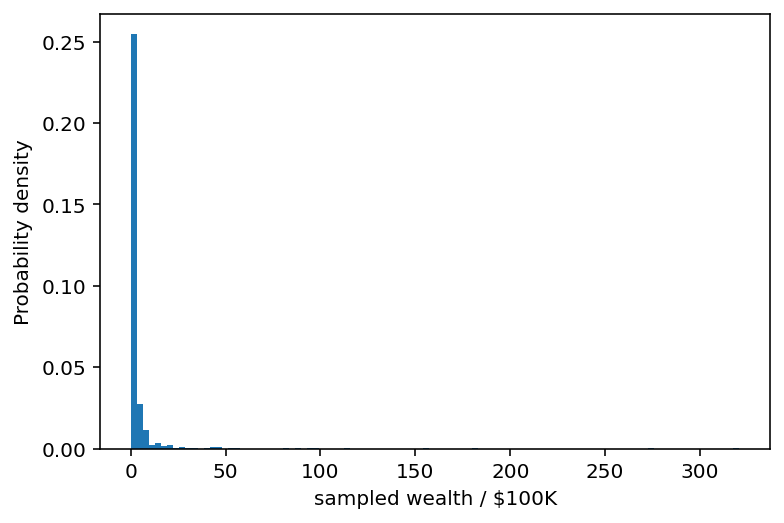

In [ ]:
## Histogram
plt.hist(sampled_wealth,bins = 100,density = True) 
plt.xlabel('sampled wealth / $100K')
plt.ylabel('Probability density')

we then sort these household wealth from the highest to the lowest:

In [ ]:
## sort household wealth
sorted_wealth = np.sort(sampled_wealth)[::-1]
print('sorted sampled wealth: '+str(sorted_wealth[0:4]))

sorted sampled wealth: [320.74652765 273.63126338 181.83763528 154.3868831 ]


We observe how many households hold 80% of wealth: 

Text(0, 0.5, 'Proportion of total wealth')

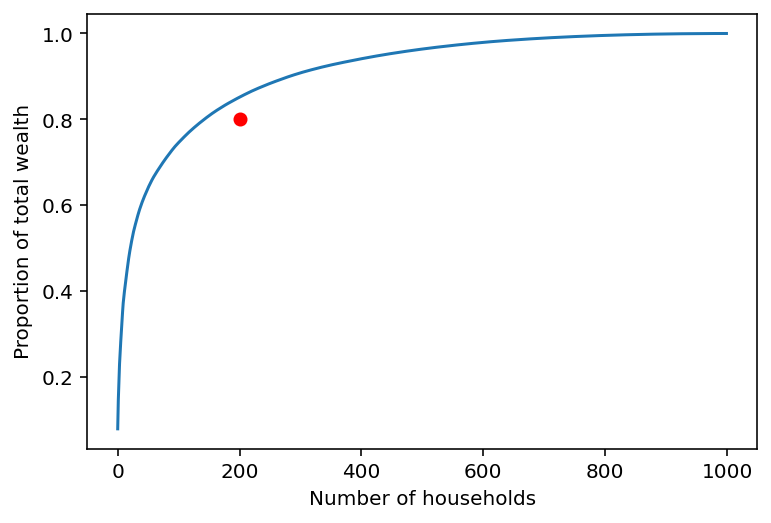

In [ ]:
## Cumulative wealth proportions
plt.plot(np.cumsum(sorted_wealth/np.sum(sorted_wealth)))
plt.scatter(200,0.8,color = 'red')
plt.xlabel('Number of households')
plt.ylabel('Proportion of total wealth')

Then 200 households among 1,000 households (20% households) hold > 80 % of wealth. That's indeed the Economic Inequality. 

How is that related to natural events? For example, the 20% rainfalls in a year provide 80% of total amount of annual rainfalls. Extreme events are more influential. 

**Definition**: 

Pareto distribution is a power-law probability distribution:

Cumulative distribution function of Pareto distribution (Type I): 
$$F_X(x) = 1-(\frac{x}{\sigma})^{-\alpha}, x \geq \sigma, \alpha >0 $$

$\sigma$ is a scale parameter, $\alpha$ is the power index/shape parameter.

Recall our wealth example, if wealth value $x$ is large, then the probability of households having more wealth than $x$: 
$$P(X\geq x) = 1-F_X(x) = (\frac{x}{\sigma})^{-\alpha}$$

is exponentially decreasing with $x$.

If we take logarithm on both sides: 

$$\log(P(X> x)) = \log(1-F_X(x)) = -\alpha\log(\frac{x}{\sigma})$$

There is a linear relationship between $-\log(P(X> x))$ and $\log(x)$ .

**Infinite mean** $0< \alpha \leq 1$: 

Pareto distribution has a infinite mean when $0< \alpha \leq 1$. And in this case, pareto distribution does not obey the Central Limit Theorem. 

For example when $\alpha = 0.1$, we take the maximum of 1000 samples: 

In [ ]:
np.max(np.random.pareto(0.1, size=1000))

9.477307037447922e+33

which is extremely large $\rightarrow \infty$.

### Pareto quantile plot

We can use the linear relationship between $-\log(P(X> x))$ and $\log(x)$ to test if a distribution is a Pareto distribution. $-\log(P(X> x))$ gives us the theortical quantiles. And we can calculate $\log(x)$ and see if $\log(x)$ are linear to $-\log(P(X> x))$

How to calculate $P(X>x)$ empirically? 

We can find a threshold $x$ and calculate how many samples in our dataset are larger than $x$. Then divided by total number of samples. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Empirical log quantile')

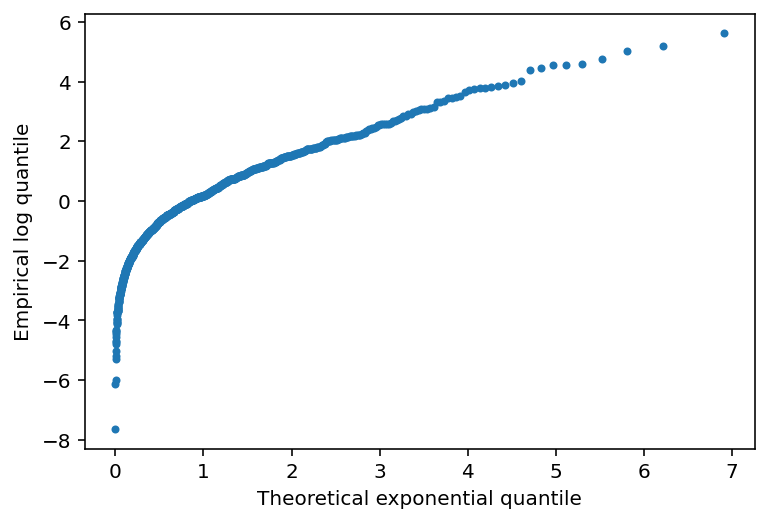

In [ ]:
## Pareto quantile plot for wealth data
P_X_larger_x = [np.mean(sampled_wealth>sampled_wealth[i]) for i in range(len(sampled_wealth))]
plt.plot(-np.log(P_X_larger_x), np.log(sampled_wealth),'.')
plt.xlabel('Theoretical exponential quantile')
plt.ylabel('Empirical log quantile')

We rank our samples from the largest to the smallest: 
$x_1^*\geq x_2^*\geq ...\geq x_k^* \geq ... \geq x_n^*$,

then calculate $\log(P(X> x_{k}^{*})) = \log(k/(n+1))$

then we plot $-\log(k/(n+1))$ versus $\log(x_{k}^*)$

In [ ]:
def pareto_quantile(data):
    # -log(P(X > x)) vs log(x)
    ## Note here -log(P(X > x)) is not the theoretical quantile of Pareto distribution. 
    ## Theoretical Pareto quantile is exp(-log(P(X>x))) 
    ## In fact, -log(P(X > x)) is the theoretical quantile of exponential distribution. Please refer to the next section. 
    
    data = np.sort(data)[::-1]
    n = len(data)
    P_X_larger_x = np.arange(1,n+1)/(n+1)
    fig = plt.figure()
    plt.plot(-np.log(P_X_larger_x), np.log(data),'.')
    plt.xlabel('Theoretical exponential quantile')
    plt.ylabel('Empirical log quantile')

Text(0.5, 1.0, 'Wealth data')

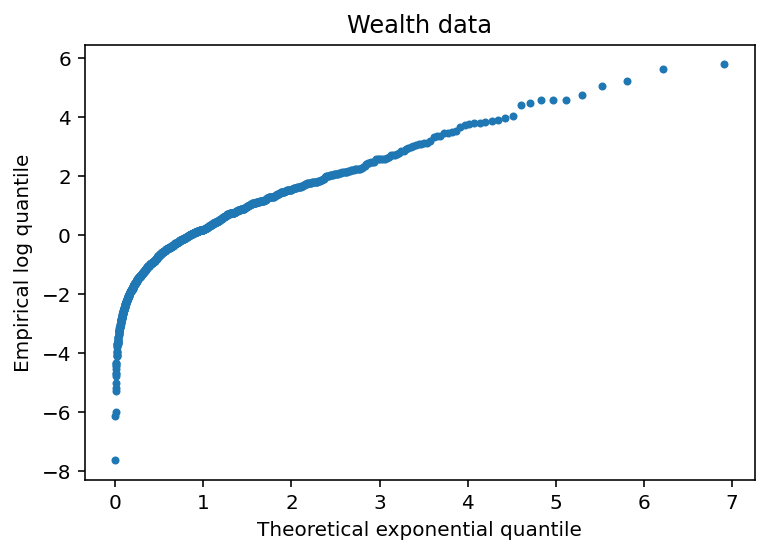

In [ ]:
## Pareto quantile plot for wealth data
pareto_quantile(sampled_wealth)
plt.title('Wealth data')

So for both calculations, we can see the linear relationship, especially at the tail of extreme values. This linearity tells us the wealth data is Pareto distributed. 



---


Also there is the linear relationship between $\exp(-\log(P(X> x)))$ and $x$. But then the $x$ will be very skewed and we can not easy see the linearity. Therefore, we prefer the quantile plot above for a better visualization. 

In [ ]:
def pareto_quantile2(data):
    # exp(-log(P(X>x))) vs x
    data = np.sort(data)[::-1]
    n = len(data)
    P_X_larger_x = np.arange(1,n+1)/(n+1)
    fig = plt.figure()
    plt.plot(np.exp(-np.log(P_X_larger_x)), data,'.')
    plt.xlabel('Theoretical pareto quantile')
    plt.ylabel('Empirical quantile')

Text(0.5, 1.0, 'Wealth data')

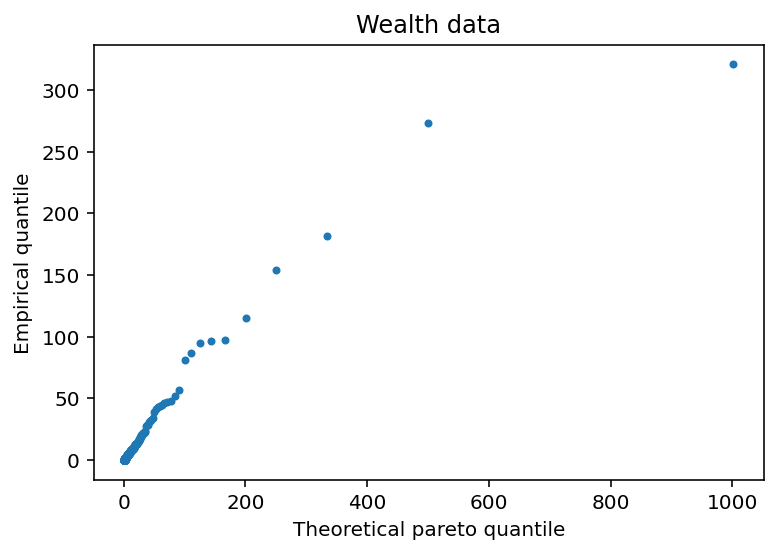

In [ ]:
## Pareto quantile plot for wealth data
pareto_quantile2(sampled_wealth)
plt.title('Wealth data')

### Exponential distribution

Exponential distribution is also a long tail distribution.  This has a tail that falls exponentially. 

**Definition:**

Probability density function for exponential distributions with random variable $X$:

$$f_X(x;\lambda)  = \lambda e^{-\lambda x}, x \geq 0$$

Cumulative distribution function for exponential distributions with random variable $X$:

$$F_X(x;\lambda) = 1-e^{-\lambda x}$$
Therefore,
$$P(X>x) = e^{-\lambda x}$$

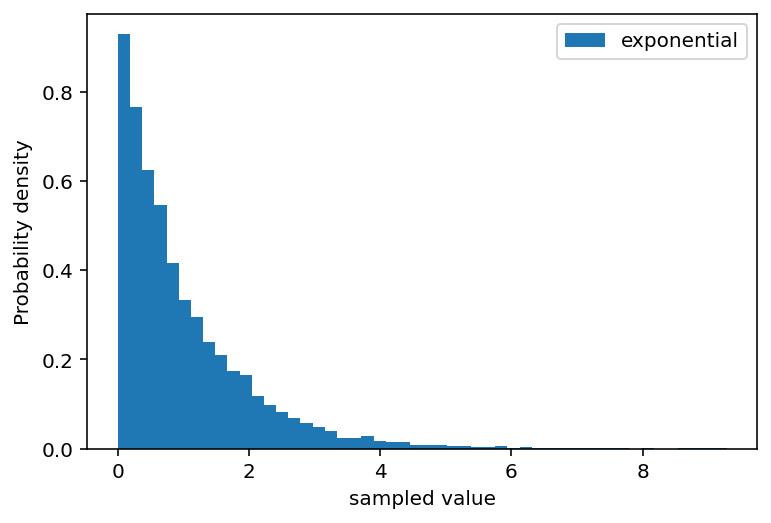

In [ ]:
## sampled values from exponential distribution
exponential_samples = np.random.exponential(size = 10000)
plt.hist(exponential_samples,label = 'exponential',density = True, bins = 50)
plt.xlabel('sampled value')
plt.ylabel('Probability density')
plt.legend()

### Exponential quantile plot

There is a linear relationship between $-\log(P(X>x))$ and $x$. As we learned earlier in Pareto quantile plot, now we can plot $−\log(k/(n+1))$ versus $x$ to test if a distribution is an exponential distribution. 



In [ ]:
def exponential_quantile(data):
    data = np.sort(data)[::-1]
    n = len(data)
    P_X_larger_x = np.arange(1,n+1)/(n+1)
    fig = plt.figure()
    plt.plot(-np.log(P_X_larger_x), data,'.')
    plt.xlabel('Theoretical exponential quantile')
    plt.ylabel('Empirical quantile')

Text(0.5, 1.0, 'exponential distribution samples')

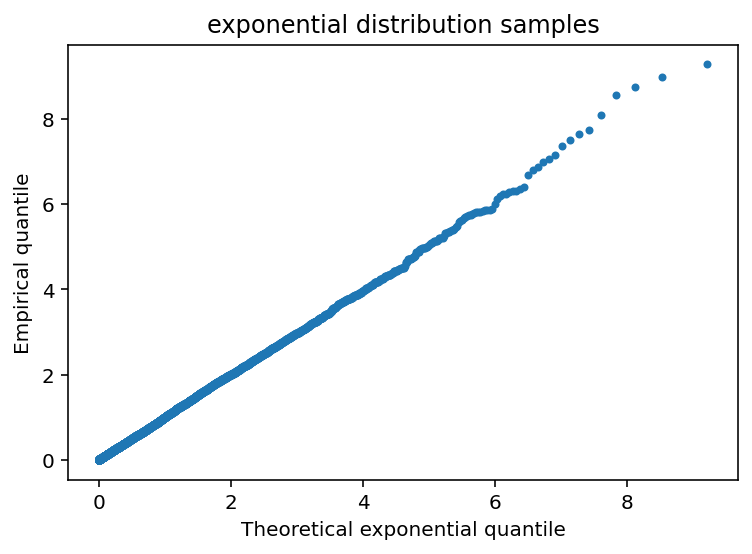

In [ ]:
exponential_quantile(exponential_samples)
plt.title('exponential distribution samples')

### Fit log-normal distribution to diamond datasets

Let's say now we use one long-tail distribution and fit our diamond dataset. 

1) we assume the distribution of sampled value is log-normal distribution 

2) we estimate mean $\mu$ and variance $\sigma^2$ after taking logarihm of our samples.

We then test this procedure on our diamond dataset 1:

In [ ]:
mu = np.mean(np.log(diamond_dataset1))
print('estimated mean: '+str(mu))

estimated mean: -0.32521771963108975


In [ ]:
sigma = np.std(np.log(diamond_dataset1))
print('estimated standard deviation: '+str(sigma))

estimated standard deviation: 1.0720614512309823


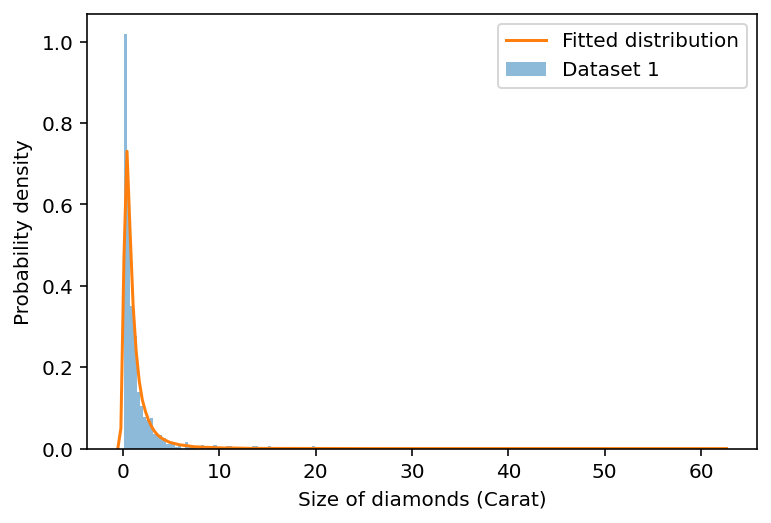

In [ ]:
plt.hist(diamond_dataset1,bins = 60,alpha = 0.5,label = 'Dataset 1',density = True)
sns.kdeplot(log_normal_sampling(100000,mu,sigma),alpha = 0.5,label = 'Fitted distribution')
plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Probability density')
plt.legend()

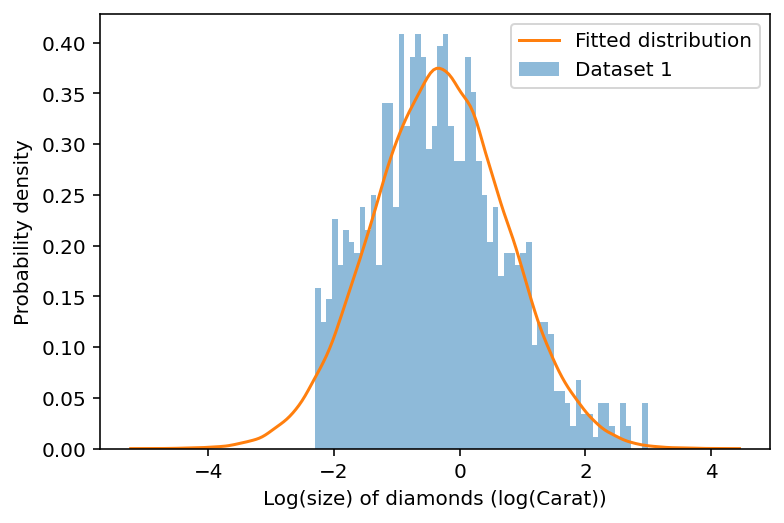

In [ ]:
plt.hist(np.log(diamond_dataset1),bins = 60,alpha = 0.5,label = 'Dataset 1',density = True)
sns.kdeplot(np.log(log_normal_sampling(100000,mu,sigma)),alpha = 0.5,label = 'Fitted distribution')
plt.xlabel('Log(size) of diamonds (log(Carat))')
plt.ylabel('Probability density')
plt.legend()

We observe that the log-normal distribution mostly fits the higher value diamond, but not the lower values. 
We do not observe lower values (less than 0.1 carat) in this diamond deposit. 

The goal is to use a fitted model to extrapolate larger or smaller diamond size. In the next notebook, we will learn other ways to fit a long-tail distribution.

**Exercise**: Can you perform the log-normal fitting for Deposit 2? How do you interpret the result? 


## Summary

From this notebook, we understand some basic statistics to analyze 2 diamond datasets: histogram, mean, quantile, qqplot. And we learn that distributions of earth properties are usually not Gaussian, but have long tails. Several long tail distributions have introduced. 

Next practice notebook, we will analyze our diamond datasets, by a new form of statistics: Extreme Value theory. 
